<img src="http://andtek.pro/wp-content/uploads/2016/12/Sonity-FINAL-350x350.jpg" width="240" height="240" align="center"/>

# SonityWolf Post Analyzer

## Microtargeting tool

Based on the information provided by the profilecrawl, this notebook generates hashtags microtargeting the users based on the analysis of your profile

In [191]:
#dependences:
from os import listdir
from os.path import isfile, join
import json
from pprint import pprint
from collections import Counter
from IPython.core.display import display, HTML

In [192]:
accounts = [f.replace(".json","") for f in listdir("./accounts") if isfile(join("./accounts", f))]
print("Accounts Avalaible:")
for index, account in enumerate(accounts):
    print(f"{index} - {account}")

Accounts Avalaible:
0 - andtek.pro
1 - patrick_maciazek


In [193]:
account = accounts[0] #Choose one of the list starting from 0

In [194]:
account

'andtek.pro'

In [209]:
with open(f"accounts/{account}.json") as f:
    data = json.load(f)
# pprint(data)

In [196]:
#Get All Tags
all_tags = []

for post in data['posts']:
    all_tags += post['tags']

In [211]:
hashtag_counter = Counter([x.lower() for x in all_tags])

#pprint(hashtag_counter)

In [208]:
hashtag_render = ""
for ht in [tup[0] for tup in hashtag_counter.most_common(40)]:
    hashtag_render += ht + " "
hashtag_render

'#music #cool #me #keyboard #apple #korg #art #ibanez #ipad #piano #musician #guitar #rockprog #roland #rock #tagsforlikes #mac #programming #myroland #canada #midi #toronto #caracas #friends #venezuela #electricguitar #recording #fila2015 #animation #fantom #kronos #composing #gopro #cinema4d #musican #keyboards #nvidia #cubase #oasys #macbook '

In [212]:
hashtag_render.replace("#","")

'music cool me keyboard apple korg art ibanez ipad piano musician guitar rockprog roland rock tagsforlikes mac programming myroland canada midi toronto caracas friends venezuela electricguitar recording fila2015 animation fantom kronos composing gopro cinema4d musican keyboards nvidia cubase oasys macbook '

['#music', '#cool', '#me', '#keyboard', '#apple', '#korg', '#art', '#ibanez', '#ipad', '#piano', '#musician', '#guitar', '#rockprog', '#roland', '#rock', '#tagsforlikes', '#mac', '#programming', '#myroland', '#canada']


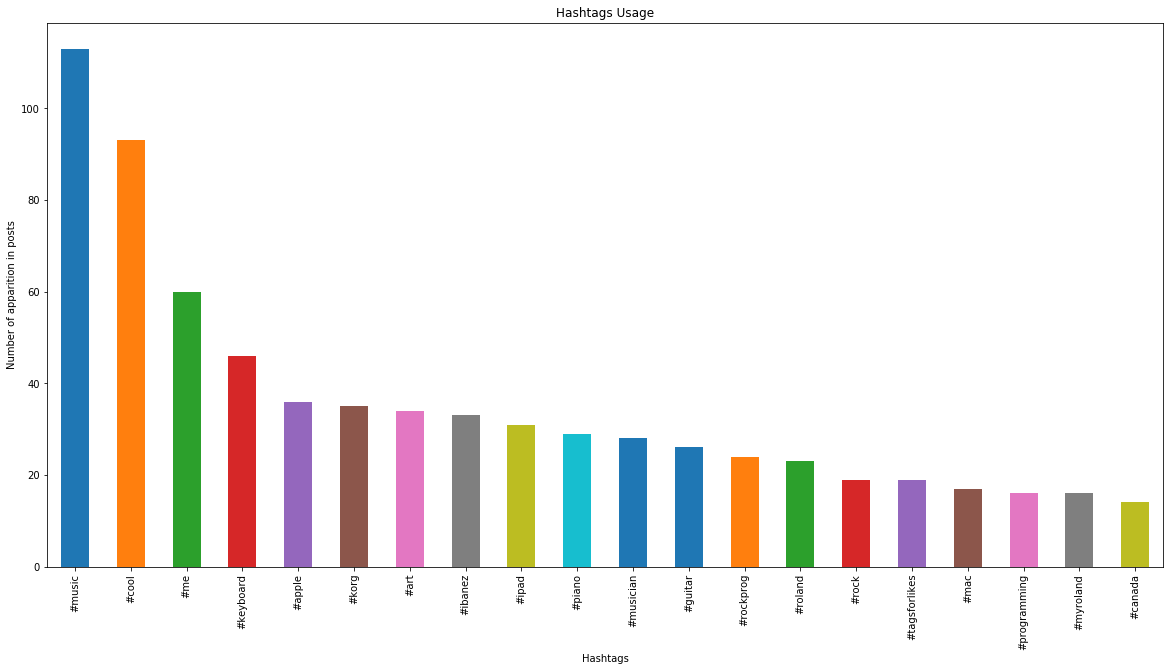

In [199]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

graph = hashtag_counter.most_common(20)

x = [tup[0] for tup in graph]
y = [tup[1] for tup in graph]

print(x)
s = pd.Series(y, index=x)

s.plot.bar(figsize=(20,10))
plt.xlabel('Hashtags')
plt.ylabel('Number of apparition in posts')
plt.title("Hashtags Usage");

In [200]:
#Most Liked Post
most_liked = {'likes':0}
for post in data['posts']:
    if post['likes'] > most_liked['likes']:
        most_liked = post
display(HTML(f"<img src={most_liked['img']} align=\"center\"/>"))
pprint(most_liked)

{'caption': 'Studio Sessions! #music #studio',
 'comments': 11,
 'date': '2016-12-01T04:30:52.000Z',
 'img': 'https://instagram.fybz2-2.fna.fbcdn.net/vp/4cf11ceb545effe7f4622890c15dfdfe/5BA25F4E/t51.2885-15/e35/15251784_406458766410633_6926493114014105600_n.jpg',
 'likes': 245,
 'location': {'latitude': '',
              'location_id': 0,
              'location_name': '',
              'location_url': '',
              'longitude': ''},
 'tags': ['#music', '#studio']}


In [203]:
#less_liked
for post in data['posts']:
    try:    
        if post['likes'] < most_liked['likes']:
            less_liked = post
    except:
        less_liked = post

display(HTML(f"<img src={less_liked['img']} align=\"center\"/>"))
pprint(less_liked)

{'caption': 'Nos vemos el viernes 12 de junio en el teatrex el bosque!!! '
            '#GrupoASA #working #theater #cool',
 'comments': 0,
 'date': '2015-05-28T11:16:34.000Z',
 'img': 'https://instagram.fybz2-2.fna.fbcdn.net/vp/1d10af9423fa31ba92cf834f0b2167a9/5BAD4297/t51.2885-15/e15/11327218_730127970432153_692778144_n.jpg',
 'likes': 18,
 'location': {'latitude': '',
              'location_id': 0,
              'location_name': '',
              'location_url': '',
              'longitude': ''},
 'tags': ['#GrupoASA', '#working', '#theater', '#cool']}
